# This file is part of the first CA of CCT College Dublin student Illia Fadieiev

## Importing needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Reading dataset

In [2]:
df = pd.read_csv("main_dataset.csv")

In [3]:
df.head(5)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


## Remove unnecessary data

In [4]:
unique_age_groups = df['Age Group'].unique()
print(unique_age_groups)

['Under 1 year' '0 - 4 years' '0 - 14 years' '1 - 4 years' '5 - 9 years'
 '10 - 14 years' '15 - 19 years' '15 - 24 years' '15 years and over'
 '20 - 24 years' '25 - 29 years' '25 - 44 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '45 - 64 years'
 '50 - 54 years' '55 - 59 years' '60 - 64 years' '65 - 69 years'
 '65 years and over' '70 - 74 years' '75 - 79 years' '80 - 84 years'
 '85 years and over' 'All ages']


In [5]:
selected_age_groups = ['Under 1 year', '1 - 4 years', '0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']

In [6]:
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
df = filtered_by_age_groups_df
df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [7]:
df.drop(columns=["STATISTIC Label", "UNIT"], inplace=True)

## Check for missing values

In [8]:
missing_values = df.isnull().sum()
print("Кількість відсутніх значень в кожній колонці:")
print(missing_values)

Кількість відсутніх значень в кожній колонці:
Year           0
Age Group      0
Sex            0
VALUE        114
dtype: int64


In [9]:
missing_values = df[df['VALUE'].isnull() | df['Year'].isnull() | df['Sex'].isnull() | df['Age Group'].isnull()]

print("Missing values for Year, Sex, and Age Group:")
print(missing_values)

Missing values for Year, Sex, and Age Group:
      Year    Age Group         Sex  VALUE
3     1950  0 - 4 years  Both sexes    NaN
4     1950  0 - 4 years        Male    NaN
5     1950  0 - 4 years      Female    NaN
165   1952  0 - 4 years  Both sexes    NaN
166   1952  0 - 4 years        Male    NaN
...    ...          ...         ...    ...
3568  1994  0 - 4 years        Male    NaN
3569  1994  0 - 4 years      Female    NaN
3648  1995  0 - 4 years  Both sexes    NaN
3649  1995  0 - 4 years        Male    NaN
3650  1995  0 - 4 years      Female    NaN

[114 rows x 4 columns]


In [10]:
filled_df = pd.DataFrame(columns=df.columns)

grouped_df = df.groupby(['Year', 'Sex'])

for (year, sex), group in grouped_df:
    if group.loc[group['Age Group'] == '0 - 4 years', 'VALUE'].isnull().all():
        total_value = group.loc[group['Age Group'].isin(['Under 1 year', '1 - 4 years']), 'VALUE'].sum()
        
        group.loc[group['Age Group'] == '0 - 4 years', 'VALUE'] = total_value
        
    filled_df = pd.concat([filled_df, group])

filled_df.reset_index(drop=True, inplace=True)

df = filled_df

In [11]:
selected_age_groups = ['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
df = filtered_by_age_groups_df
df.head()

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6


## Visualization of age structure of population in 1950-2023

In [12]:
filtered_by_sex_df = df[df['Sex'].isin(["Both sexes"])]
filtered_by_sex_df.head()

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6


<Figure size 1000x600 with 0 Axes>

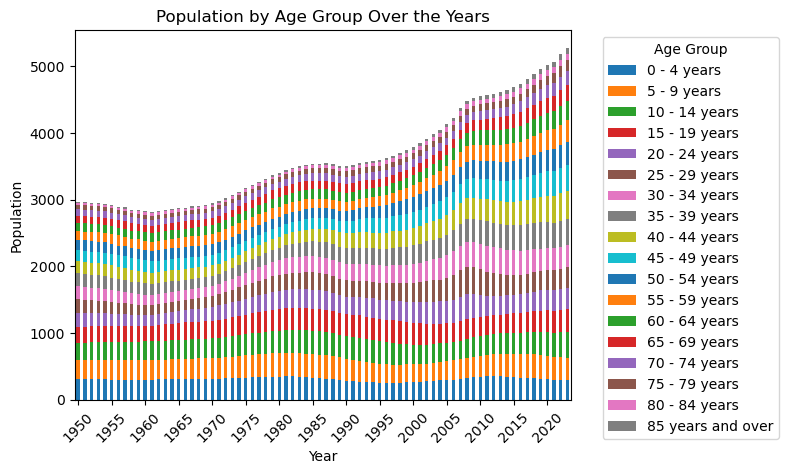

In [13]:
age_group_dtype = pd.CategoricalDtype(categories=selected_age_groups, ordered=True)

filtered_by_sex_df_copy = filtered_by_sex_df.copy()

filtered_by_sex_df_copy['Age Group'] = filtered_by_sex_df_copy['Age Group'].astype(age_group_dtype)

grouped_df = filtered_by_sex_df_copy.groupby(['Year', 'Age Group'])['VALUE'].sum().reset_index()

pivot_df = grouped_df.pivot(index='Year', columns='Age Group', values='VALUE')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Age Group Over the Years')
plt.legend(title='Age Group')

years = pivot_df.index
plt.xticks(range(0, len(years), 5), years[::5], rotation=45)

plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [14]:
def plot_population_pyramid(df, years):
    colors = ['pink', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed

    fig, ax1 = plt.subplots(figsize=(10, 6))

    for i, year in enumerate(years):
        male_data = df[((df['Year'] == year) & 
                        df['Age Group'].isin(selected_age_groups)) & 
                       (df['Sex'] == 'Male')].copy()
        female_data = df[((df['Year'] == year) & 
                          df['Age Group'].isin(selected_age_groups)) & 
                         (df['Sex'] == 'Female')].copy()

        ax1.barh(female_data['Age Group'], female_data['VALUE'], color=colors[i], label=f'Female ({year})')

        ax1.barh(male_data['Age Group'], -male_data['VALUE'], color=colors[i], label=f'Male ({year})')

    ax1.set_xlabel('Population (in Thousands)')
    ax1.set_ylabel('Age Group')

    ax1.axvline(x=0, color='black', linewidth=1)

    plt.title('Population Pyramid of Selected Age Groups in Ireland')

    plt.legend()
    plt.show()

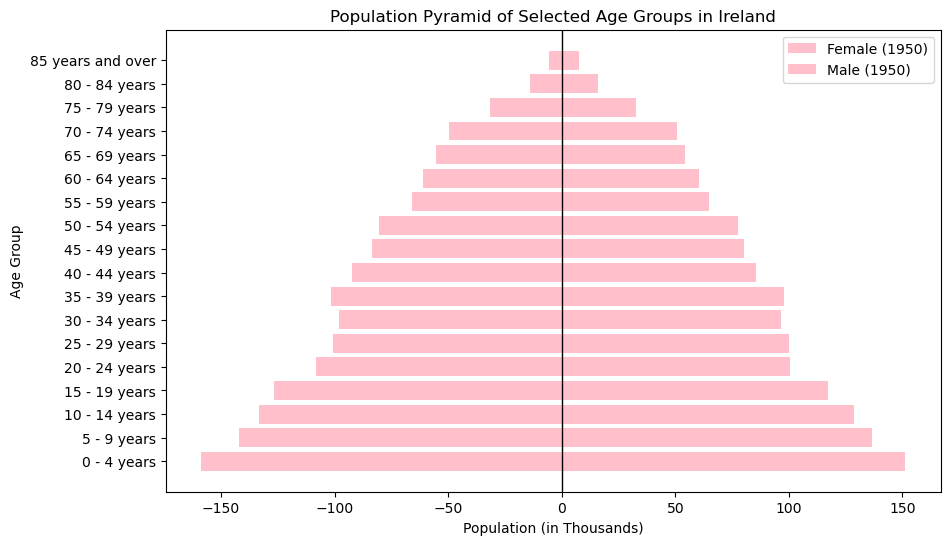

In [15]:
plot_population_pyramid(df, [1950])

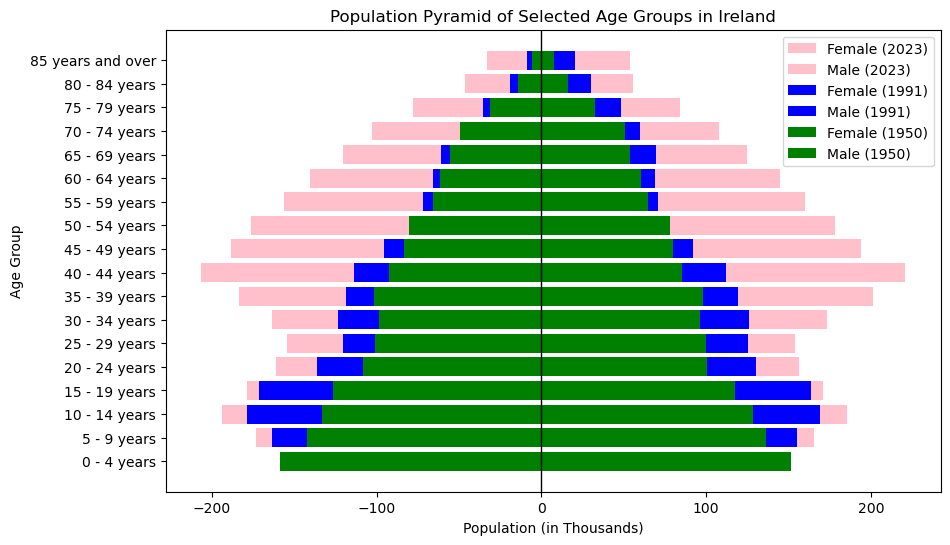

In [19]:
plot_population_pyramid(df, [2023, 1991, 1950])

## Counting the average age

In [17]:
both_sexes_df = df[(df['Sex'] == 'Both sexes')].copy()

both_sexes_df.head(20)

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6
7,1950,25 - 29 years,Both sexes,201.1
8,1950,30 - 34 years,Both sexes,194.8
9,1950,35 - 39 years,Both sexes,199.8
10,1950,40 - 44 years,Both sexes,177.9
11,1950,45 - 49 years,Both sexes,163.8
